# Modeling Classification Problems using CNNs

Made for the Data Science Workshop 2018 (African Institute for Mathematical Sciences)

## Imports first

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline

## Load the dataset

In [4]:
# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 3')

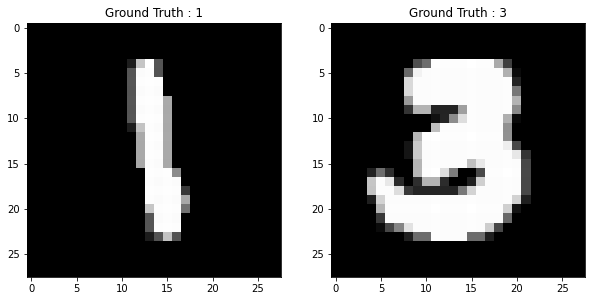

In [4]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[200,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[200]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[200,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[200]))

## Reshape the data

In [5]:
train_samples = X_train.shape[0]

In [6]:
test_samples = X_test.shape[0]

In [7]:
# reshape to be [samples][width][height][channels]
width = 28
height = 28
channels = 1
X_train = X_train.reshape(train_samples, width, height, channels)
X_test = X_test.reshape(test_samples, width, height, channels)

In [8]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Normalise the data

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


## One hot encoding

In [10]:
# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

## Create a convolutional neural network model

Documentation about the layers: 

2D convolutional layers: https://keras.io/layers/convolutional/#conv2d

2D max pooling: https://keras.io/layers/pooling/#maxpooling2d

flatten: https://keras.io/layers/core/#flatten

Dropout: https://keras.io/layers/core/#dropout

In [11]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = cnn_model()

## Determine the number of trainable parameters

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Do you notice the drastic amount of trainable parameters as compared to the previous examples (non-cnn)?

## Begin training

In [ ]:
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 106s 352ms/step - loss: 0.5199 - accuracy: 0.8348 - val_loss: 0.0607 - val_accuracy: 0.9782
Epoch 2/2
216/300 [====================>.........] - ETA: 28s - loss: 0.0942 - accuracy: 0.9729

## Determine the error of the model

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

## Predict on one example

In [ ]:
model.predict_classes(np.expand_dims(X_test[0], axis=0))

In [ ]:
model.predict_classes(X_test[0].reshape((1, 28, 28, 1)))

## Saving the model

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")

## Loading the model

In [ ]:
model = cnn_model()
model.load_weights("model.h5")

In [ ]:
model.predict_classes(X_test[1].reshape((1, 28, 28, 1)))

In [ ]:
plt.imshow(np.reshape(X_test[1],(28,28)))